In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict 
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()  # take environment variables from .env
llm=init_chat_model("groq:llama-3.1-8b-instant")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000023B7206B610>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000023B73103C50>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state:JokeState): 
    prompt = f"""Generate a joke about the following topic: {state['topic']}
    
    The joke should be concise and humorous.
    """
    
    response=llm.invoke(prompt).content
    
    return {"joke": response}

In [7]:
def explain_joke(state:JokeState): 
    prompt = f"""Explain the following joke: {state['joke']}
    
    The explanation should be clear and insightful.
    """
    
    response=llm.invoke(prompt).content
    
    return {"explanation": response}

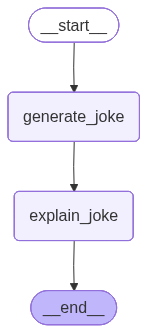

In [9]:
graph=StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('explain_joke',explain_joke)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','explain_joke')
graph.add_edge('explain_joke',END)

checkpointer=InMemorySaver()
workflow=graph.compile(checkpointer=checkpointer)
workflow

In [11]:
config1={"configurable":{"thread_id":1}}
result1=workflow.invoke({"topic":"programming"},config=config1)

In [12]:
result1

{'topic': 'programming',
 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.',
 'explanation': 'This joke relies on a play on words, combining a common programmer\'s issue (debugging) with the literal meaning of the phrase "bugs." In this context, a "bug" is a small error or issue in a program that needs to be fixed.\n\nHowever, the phrase "bugs" also refers to insects, such as mosquitoes, flies, or beetles, which are often attracted to light. \n\nThe joke states that programmers prefer dark mode (a feature that changes the color scheme of a program to darker colors, often to reduce eye strain) because light attracts bugs. Here, "bugs" is used in the literal sense, implying that the light from a screen can attract insects, but also in the technical sense, implying that the light is causing errors in the program.\n\nThe humor in the joke arises from the clever use of ambiguity, where the two meanings of "bugs" are used together to create a pun. The joke requi

In [13]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.', 'explanation': 'This joke relies on a play on words, combining a common programmer\'s issue (debugging) with the literal meaning of the phrase "bugs." In this context, a "bug" is a small error or issue in a program that needs to be fixed.\n\nHowever, the phrase "bugs" also refers to insects, such as mosquitoes, flies, or beetles, which are often attracted to light. \n\nThe joke states that programmers prefer dark mode (a feature that changes the color scheme of a program to darker colors, often to reduce eye strain) because light attracts bugs. Here, "bugs" is used in the literal sense, implying that the light from a screen can attract insects, but also in the technical sense, implying that the light is causing errors in the program.\n\nThe humor in the joke arises from the clever use of ambiguity, where the two meanings of "bugs" are used together to create a 

In [14]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.', 'explanation': 'This joke relies on a play on words, combining a common programmer\'s issue (debugging) with the literal meaning of the phrase "bugs." In this context, a "bug" is a small error or issue in a program that needs to be fixed.\n\nHowever, the phrase "bugs" also refers to insects, such as mosquitoes, flies, or beetles, which are often attracted to light. \n\nThe joke states that programmers prefer dark mode (a feature that changes the color scheme of a program to darker colors, often to reduce eye strain) because light attracts bugs. Here, "bugs" is used in the literal sense, implying that the light from a screen can attract insects, but also in the technical sense, implying that the light is causing errors in the program.\n\nThe humor in the joke arises from the clever use of ambiguity, where the two meanings of "bugs" are used together to create a

In [15]:
config2={"configurable":{"thread_id":2}}
result2=workflow.invoke({"topic":"ai"},config=config2)
result2

{'topic': 'ai',
 'joke': 'Why did the AI go to therapy? It had a little " glitch" in its personality.',
 'explanation': 'This joke relies on a play on words and a clever connection between the world of technology and human psychology.\n\nIn the joke, the AI (Artificial Intelligence) is described as having a "glitch" in its personality, which is a pun. In computer science, a glitch refers to an unexpected or unintended error in a program or system. However, in the context of the joke, it\'s used to describe a problem or issue with the AI\'s personality.\n\nThe joke is saying that the AI has a flaw or imperfection in its personality, much like a glitch in a computer program. This is a clever connection because AI systems are designed to mimic human behavior and personality, but they\'re still just machines. The joke is implying that the AI has a personality "bug" that it needs to work out in therapy.\n\nThe joke is also poking fun at the idea that AI systems can have personalities, flaws

In [17]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'ai', 'joke': 'Why did the AI go to therapy? It had a little " glitch" in its personality.', 'explanation': 'This joke relies on a play on words and a clever connection between the world of technology and human psychology.\n\nIn the joke, the AI (Artificial Intelligence) is described as having a "glitch" in its personality, which is a pun. In computer science, a glitch refers to an unexpected or unintended error in a program or system. However, in the context of the joke, it\'s used to describe a problem or issue with the AI\'s personality.\n\nThe joke is saying that the AI has a flaw or imperfection in its personality, much like a glitch in a computer program. This is a clever connection because AI systems are designed to mimic human behavior and personality, but they\'re still just machines. The joke is implying that the AI has a personality "bug" that it needs to work out in therapy.\n\nThe joke is also poking fun at the idea that AI systems can have 